<a href="https://colab.research.google.com/github/SimonHuy/CoronaVirusDetection/blob/main/Corona_virus_detection_using_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Directories with training pictures
train_corona_dir = os.path.join("/content/drive/MyDrive/corona-virus-detection-using-Xray/train/corona")
train_normal_dir = os.path.join("/content/drive/MyDrive/corona-virus-detection-using-Xray/train/normal")


train_corona_names = os.listdir(train_corona_dir)
train_normal_names = os.listdir(train_normal_dir)


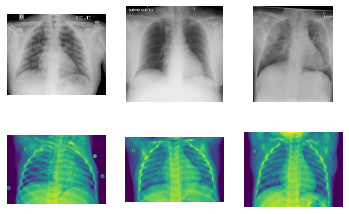

In [24]:
# Visualize some pictures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

pic_index += 3
next_corona_pix = [os.path.join(train_corona_dir, fname) 
    for fname in train_corona_names[0:pic_index]]
next_normal_pix = [os.path.join(train_normal_dir, fname) 
    for fname in train_normal_names[0:pic_index]]


for i,img_path in enumerate(next_corona_pix + next_normal_pix):
  sp =plt.subplot(nrows, ncols, i + 1)
  sp.axis("Off")
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()



In [5]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), activation = "relu", input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation= "relu"),
                                    tf.keras.layers.Conv2D(64,(3,3), activation= "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), activation= "relu"),
                                    tf.keras.layers.Conv2D(128,(3,3), activation= "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [6]:
BATCHSIZE = 20
TRAINING_DIR = "/content/drive/MyDrive/corona-virus-detection-using-Xray/train"
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest")

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = BATCHSIZE,
                                                    class_mode ="binary",
                                                    target_size = (150,150))


VALIDATING_DIR = "/content/drive/MyDrive/corona-virus-detection-using-Xray/val"    
valid_datagen = ImageDataGenerator(rescale = 1.0/255)
                                 
                                   

valid_generator = valid_datagen.flow_from_directory(VALIDATING_DIR,
                                                    batch_size = BATCHSIZE,
                                                    class_mode = "binary",
                                                    target_size = (150,150))                          

Found 244 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.99):
            print("\nReached 99 accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [8]:
model.compile(optimizer=RMSprop(learning_rate = 0.001),
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [9]:
history = model.fit(train_generator,
                    validation_data= valid_generator,
                    epochs = 50,
                    steps_per_epoch = 12,
                    validation_steps = 1,
                    verbose = 1,
                    callbacks = [callbacks])
                    

Epoch 1/50
12/12 [==============================] - 73s 6s/step - loss: 0.7803 - accuracy: 0.4821 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/50
12/12 [==============================] - 17s 1s/step - loss: 0.7275 - accuracy: 0.5312 - val_loss: 0.6821 - val_accuracy: 0.7000
Epoch 3/50
12/12 [==============================] - 17s 1s/step - loss: 0.7398 - accuracy: 0.5893 - val_loss: 0.6869 - val_accuracy: 1.0000
Epoch 4/50
12/12 [==============================] - 17s 1s/step - loss: 0.6714 - accuracy: 0.6250 - val_loss: 0.5904 - val_accuracy: 0.6500
Epoch 5/50
12/12 [==============================] - 17s 1s/step - loss: 0.7605 - accuracy: 0.7054 - val_loss: 0.5056 - val_accuracy: 0.9000
Epoch 6/50
12/12 [==============================] - 17s 2s/step - loss: 0.6522 - accuracy: 0.6562 - val_loss: 0.4819 - val_accuracy: 0.5500
Epoch 7/50
12/12 [==============================] - 18s 1s/step - loss: 0.8012 - accuracy: 0.7333 - val_loss: 0.3979 - val_accuracy: 0.9500
Epoch 8/50
12/12 [==

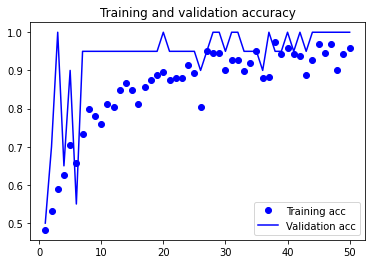

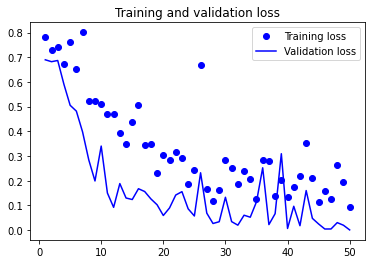

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150,3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes < 0.5:
    print(fn, classes, "Corona")
  else:
    print(fn, classes,"Normal")
  

Saving corona (4).jpeg to corona (4) (2).jpeg
Saving normal (1).jpeg to normal (1) (3).jpeg
Saving normal (2).jpeg to normal (2) (3).jpeg
corona (4).jpeg [[0.]] Corona
normal (1).jpeg [[1.]] Normal
normal (2).jpeg [[1.]] Normal


In [ ]:
os.mkdir("/tmp/coronaProject")


In [31]:
model.save("/tmp/coronaProject")

INFO:tensorflow:Assets written to: /tmp/coronaProject/assets
